[0.83903868 0.84031651 0.84038759 0.84045403]
[0.83903868 0.84031651 0.84038759 0.84045403]


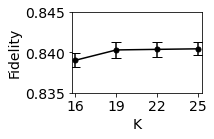

In [2]:
import sys
sys.path.insert(0, '../utils')
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d

import matplotlib.pyplot as plt
import Fidelity_Measure as fm
import Purity_Measure as pm
import Concurrence_Measure as cm
import os



# tomo_test, dm_test, dm_mle = pd.read_pickle(f'../../../../IBMQ/test_data/testdata_qubit_size_2.pkl')
# con_test = cm.concurrence(dm_mle)
# pur_test = pm.purity(dm_mle)
#
#
# fids_mle, fids_av_mle, dm_target, rho_fit_array_mle = pd.read_pickle('../../../mle_outputs/convoluted_mle_fids_list_fids_mean_shots_1024_n_size_500.pickle')
#
# # pur_mle = pm.purity(rho_fit_array_mle)
# # con_mle = cm.concurrence(rho_fit_array_mle)
# mle_m = np.array(fids_av_mle)
# mle_std = np.std(fids_mle)
# mle_mean = np.repeat(mle_m, 5)
# print(mle_mean)
# mle_std = np.repeat(mle_std, 5)
# print(mle_std)

kparams_values = ['16_no_truncation', '19_no_truncation', '22_no_truncation', '25_no_truncation']
K = [16, 19 , 22, 25]
fidelity_list, fidelity_av, dms, pur_list, params_list = pd.read_pickle("../test_prediction_results_data_driven/fidelity_list_fid_av_pred_dm_params_alpha_0.015_k_params_['16_no_truncation', '19_no_truncation', '22_no_truncation', '25_no_truncation']_qs_4.pickle")


# fid_nn = np.array(fidelity_list).reshape(4, -1)
# fid_nn_unfit = fid_nn[:5]

# fid_nn_unfit_m = np.mean(fid_nn_unfit, axis=-1)
# print(fid_nn_unfit_m)
# fid_nn_unfit_std = np.std(fid_nn_unfit, axis=-1)

fid_nn = np.array(fidelity_list).reshape(4, 10, -1)
fid_nn_unfit = fid_nn[:5]
fid_nn_unfit_m = np.mean(np.mean(fid_nn_unfit, axis=-1), axis=1)
print(fid_nn_unfit_m)
fid_nn_unfit_std = np.std(np.std(fid_nn_unfit, axis=-1), axis=-1)
fid_nn_fit = fid_nn[5:]
fid_nn_fit_m = np.mean(fid_nn_fit, axis=1)
fid_nn_fit_std = np.std(fid_nn_fit, axis=1)


# con_nn = np.array(cm_list)
pur_nn = np.array(pur_list)

# plt.errorbar(K, mle_mean, yerr=mle_std, xerr=None, fmt='--ko', ecolor='k',
#              elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
#              xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='MLE')

# plt.errorbar(K, fid_nn_fit_m, yerr=fid_nn_fit_std, xerr=None, fmt='-ro', ecolor='r',
#              elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
#              xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label='Fitted (NN)')

print(fid_nn_unfit_m)
plt.errorbar(K, fid_nn_unfit_m, yerr=fid_nn_unfit_std, xerr=None, fmt='-ko', ecolor='k',
             elinewidth=1.5, linewidth=1.5, markersize=5, capsize=5, barsabove=False, lolims=False, uplims=False,
             xlolims=False, xuplims=False, errorevery=1, capthick=1, data=None, label=r'Unfitted (NN)')


fs = 14
# plt.grid(alpha=0.2)
plt.xlabel(r'K', fontsize=fs)
plt.ylabel('Fidelity', fontsize=fs)
# plt.legend()
plt.xticks(np.arange(16, 26, 3), fontsize=fs)
plt.yticks(fontsize=fs)

# plt.axis([-0.7e6, 6e6, 0.55, 1.02])
plt.subplots_adjust(bottom=0.6, left=0.6)
plt.axis([15.75, 25.25, 0.835, .845])
# plt.subplots_adjust(bottom=0.6, left=0.6)

# plt.savefig('fid_vs_K_MA_MA_alpha_0.015.svg', dpi=600)
# plt.savefig('fid_vs_K_MA_MA_alpha_0.015.png', dpi=600)
# plt.savefig('fid_vs_K_zoomed.svg', dpi=600)

plt.show()
